In [2]:
import QPIXL.helper as hlp
from QPIXL.qiskit.qpixl_parallel import cFRQI
from qiskit_aer import StatevectorSimulator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# SOLVED - Bug with wrong colors when decoding parallel QPIXL
See how to properly prepare the arrays for encoding and decoding

/Users/marelica/Documents/QuantumArtHack/QuantumArtHack/QPIXL/helper.py:120: RuntimeWarning: overflow encountered in scalar multiply
  scal = np.pi / (a.max() * 2)


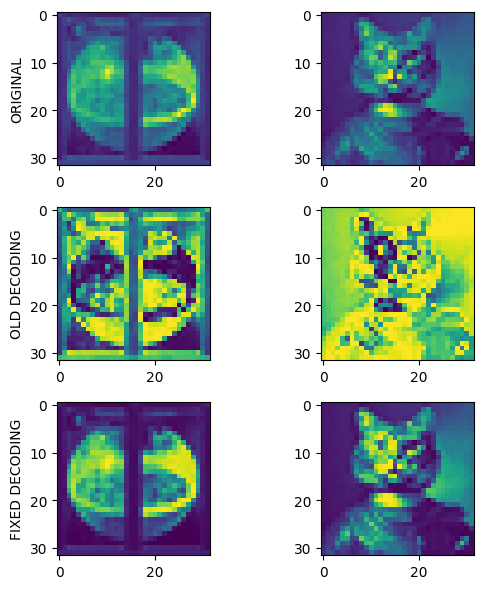

In [19]:
backend = StatevectorSimulator(method="statevector")

# Load images
img = Image.open("figures/creation_world.png")
img = img.convert("L")
img = np.array(
    img.resize((32, 32), Image.Resampling.LANCZOS)
)  # Compress for faster processing

img2 = Image.open("figures/cat.webp")
img2 = img2.convert("L")
img2 = np.array(img2.resize((32, 32), Image.Resampling.LANCZOS))

# Plot images for reference
fig, axs = plt.subplots(3, 2, figsize=(6, 6))
axs[0][0].imshow(img)
axs[0][1].imshow(img2)

# all images have the same shape here - (32,32)
shape = img.shape

# Preprocess images, convert the dtype of two of them for comparison
old_preproc_img = img.T.flatten()
old_preproc_img2 = img2.T.flatten()
fixed_preproc_img = hlp.convertForProcessing(img).T.flatten()
fixed_preproc_img2 = hlp.convertForProcessing(img2).T.flatten()

np_frame = [
    old_preproc_img,
    old_preproc_img2,
    fixed_preproc_img,
    fixed_preproc_img2
]

# Create and run circuit
decoded_data = []
labels = []
qc = cFRQI(np_frame, 0)
job = backend.run(qc)
sv = np.real(job.result().get_statevector())
decoded = hlp.decodeParallelQPIXL(sv, qc, len(np_frame))
for datum in decoded:
    decoded_data.append(hlp.reconstruct_img(datum, shape))

# Plot resulting images for comparison
axs[1][0].imshow(decoded_data[0])
axs[1][1].imshow(decoded_data[1])
axs[2][0].imshow(decoded_data[2])
axs[2][1].imshow(decoded_data[3])

axs[0][0].set_ylabel("ORIGINAL")
axs[1][0].set_ylabel("OLD DECODING")
axs[2][0].set_ylabel("FIXED DECODING")

plt.tight_layout()
plt.show()